Mounting the colab to import the model files and test images which are saved in drive for easy acces across all the models.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the best_vgg16_stage2.h5

In [5]:
import os

model_path = '/content/drive/MyDrive/Best_Model/best_vgg16_stage2.h5'
if os.path.exists(model_path):
    print(f"Model found at: {model_path}")
else:
    print(f"Model not found at: {model_path}")

Model found at: /content/drive/MyDrive/Best_Model/best_vgg16_stage2.h5


In [6]:
from tensorflow.keras.models import load_model

# Load the model
best_model = load_model(model_path)

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


Testing the model on a image from the val dataset (which the model has seen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step


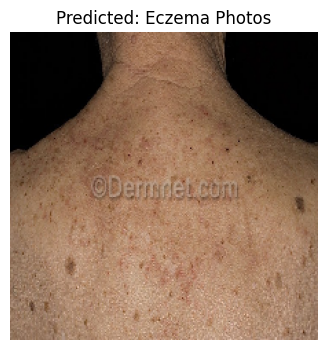

Image Path: /content/drive/MyDrive/ECE5831Project/Dermnet_split/val/Eczema Photos/eczema-trunk-generalized-36.jpg
True Label: Eczema Photos
Predicted Class: Eczema Photos


In [61]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random

IMG_SIZE = 224

def load_and_preprocess_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img, img_array

val_images = []
val_labels = []

folder = '/content/drive/MyDrive/ECE5831Project/Dermnet_split/val'
class_names = os.listdir(folder)

for _ in range(1):
    class_name = random.choice(class_names)
    class_folder = os.path.join(folder, class_name)
    image = random.choice(os.listdir(class_folder))
    val_images.append(os.path.join(class_folder, image))
    val_labels.append(class_name)

for img_path, label in zip(val_images, val_labels):
    img_pil, img_array = load_and_preprocess_image(img_path)
    probs = best_model.predict(img_array)
    top1_idx = np.argmax(probs)
    top1_class = class_names[top1_idx]
    top1_conf = float(probs[0][top1_idx])

    plt.figure(figsize=(4, 4))
    plt.imshow(img_pil)
    plt.axis('off')
    plt.title(f"Predicted: {top1_class}")
    plt.show()
    print(f"Image Path: {img_path}")
    print(f"True Label: {label}")
    print(f"Predicted Class: {top1_class}")

Testing the model by uploading a image which it has not seen

Saving Seborrheic Keratoses.png to Seborrheic Keratoses (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


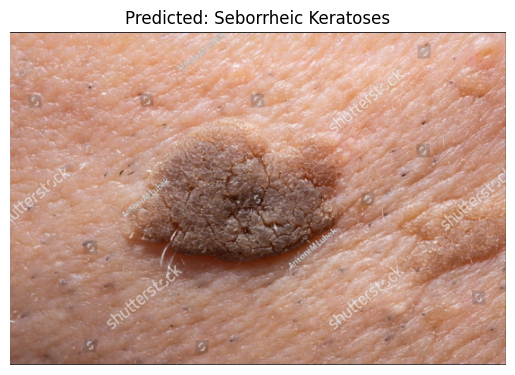

Uploaded image: Seborrheic Keratoses (2).png
Predicted Class: Seborrheic Keratoses 


In [56]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from sklearn.utils import class_weight
import io
import os

uploaded = files.upload()

class_weights = {
    0: 1.5,   # Acne
    1: 1.0,   # Eczema
    2: 2.0,   # Psoriasis / Lichen Planus
    3: 1.0,   # Seborrheic Keratoses
    4: 2.0,   # Fungal Infections
    5: 1.5    # Viral Infections
}

for file_name in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[file_name]))
    img_array = load_and_preprocess_image(image)

    predictions = best_model.predict(img_array)
    predicted_class_idx = np.argmax(predictions)

    predicted_class = class_labels[predicted_class_idx]


    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

    print(f"Uploaded image: {file_name}")
    print(f"Predicted Class: {predicted_class} ")